In [45]:
import fitz
import numpy as np

# 打开PDF文件
pdf_name = "./combinedALL_hadrons_varBins_Egap_ExpSep_ePeM_to_hadronsBES_KEDR_1,8_.pdf"
pdf_page_index = 0  # 我们将提取第一页

# 打开PDF文件并提取指定页
pdf_document = fitz.open(pdf_name)
page = pdf_document.load_page(pdf_page_index)

# 获取页面的像素数据
pix = page.get_pixmap()

# 转换像素数据为Numpy数组
img_array = np.frombuffer(pix.samples, dtype=np.uint8).reshape(
    pix.height, pix.width, pix.n)

# 找到非白色像素的上边界和下边界
non_white_rows = np.any(img_array < 255, axis=2)
top_boundary = np.argmax(non_white_rows, axis=0)
bottom_boundary = img_array.shape[0] - \
    np.argmax(np.flip(non_white_rows, axis=0), axis=0)

# 获取只包含y值的上边界和下边界数组
y_values_top = pix.height-top_boundary[top_boundary != 0]
y_values_bottom = pix.height-bottom_boundary[bottom_boundary != pix.height]
y_values_center = (y_values_top+y_values_bottom)/2
y_values_err = (y_values_top-y_values_bottom)/2

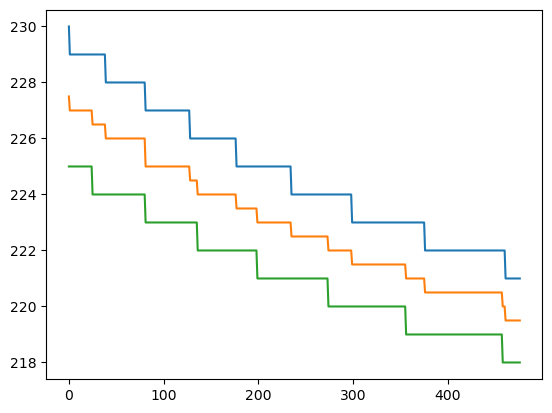

In [46]:
import matplotlib.pyplot as plt
plt.plot(y_values_top)
plt.plot(y_values_center)
plt.plot(y_values_bottom)

In [47]:
# #
# start = (0.3, 18.415)
# end = (0.72, 1059.908)
# #
# start = (0.72, 1059.908)
# end = (0.81, 687.648)
# #
# start = (0.81, 687.648)
# end = (0.98, 72.868)
# #
# start = (0.98, 72.868)
# end = (2, 0.472)
# #
# start = (3.7, 13.973)
# end = (5.0, 12.678)
# #
start = (1.8, 2.206)
end = (3.7, 2.155)


<ErrorbarContainer object of 3 artists>

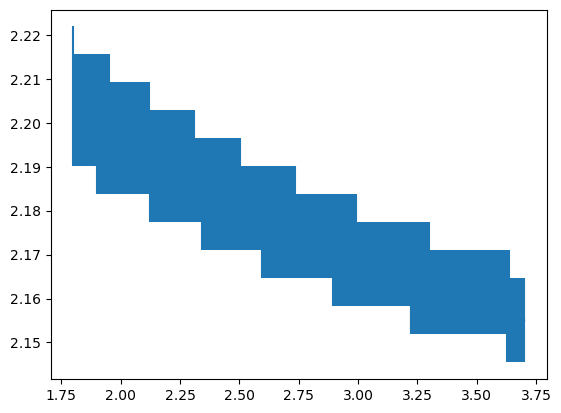

In [48]:
import pandas as pd
d_y_old = abs(y_values_center[0]-y_values_center[-1])
d_y_new = abs(start[1]-end[1])
x = np.linspace(start[0], end[0], len(y_values_center), endpoint=True)
tmp = (y_values_center-y_values_center[0])/d_y_old*d_y_new
y = tmp+start[1]
err = y_values_err/d_y_old*d_y_new
df = pd.DataFrame({"x": x, "y": y, "err": err})
# print(df)
df.to_csv(pdf_name+".csv")
plt.errorbar(x, y, err)
